In [ ]:
### Week 3 Assignment 
## Programmer's name: Savannah Gourley
## Los Angeles County data containing info on educational level and Service Planning Areas (SPAs)
## will be pulled and ran through several commands to conduct census data exploration in order to 
## produce bar charts and maps.

In [ ]:
# importing pandas

In [9]:
import pandas as pd

In [ ]:
# loading dataset 

In [11]:
df = pd.read_csv('High_School_Graduate_or_Higher_(census_tract).csv')

In [ ]:
# Peaking at dataset rows and columns

In [13]:
df.shape

(2495, 9)

In [14]:
df.head()

,OBJECTID,tract,name,hs_grad,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,1,6037101110,1011.10,90.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112
1,2,6037101122,1011.22,83.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265
2,3,6037980004,9800.04,NaN,District 5,City of Palmdale,SPA 1 - Antelope Valley,0.267915,0.003525
3,4,6037101220,1012.20,75.1,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068
4,5,6037101221,1012.21,76.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035


In [15]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      2495 non-null   int64  
 1   tract         2495 non-null   int64  
 2   name          2495 non-null   float64
 3   hs_grad       2476 non-null   float64
 4   sup_dist      2495 non-null   object 
 5   csa           2495 non-null   object 
 6   spa           2495 non-null   object 
 7   SHAPE_Length  2495 non-null   float64
 8   SHAPE_Area    2495 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 175.6+ KB


In [ ]:
### there appears to be no missing data

In [ ]:
### Need to put leading zeros for the tract number

In [16]:
df = pd.read_csv(
    'High_School_Graduate_or_Higher_(census_tract).csv',
    dtype=
    {
        'tract':str
    }
)

In [17]:
df.head()

,OBJECTID,tract,name,hs_grad,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,1,06037101110,1011.10,90.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112
1,2,06037101122,1011.22,83.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265
2,3,06037980004,9800.04,NaN,District 5,City of Palmdale,SPA 1 - Antelope Valley,0.267915,0.003525
3,4,06037101220,1012.20,75.1,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068
4,5,06037101221,1012.21,76.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035


In [ ]:
# Leading zeros! Yay!

In [ ]:
# No need to rename columns; column names already make sense

In [ ]:
# Create bar chart for the top ten SPAs that have the lowest proportions of people
# who graduated with a high school degree or higher

In [18]:
df_sorted = df.sort_values(by='hs_grad',ascending = True)

In [24]:
df_sorted[['spa','hs_grad']].head(10)

,spa,hs_grad
638,SPA 4 - Metro,30.9
1780,SPA 6 - South,32.4
627,SPA 4 - Metro,33.3
628,SPA 4 - Metro,33.5
780,SPA 6 - South,33.8
784,SPA 6 - South,34.2
1705,SPA 7 - East,34.6
794,SPA 6 - South,35.1
630,SPA 4 - Metro,37.1
1784,SPA 6 - South,37.3


<Axes: title={'center': '10 Lowest LA SPAs with High School or Higher Completion Rate in 2023'}, xlabel='spa'>

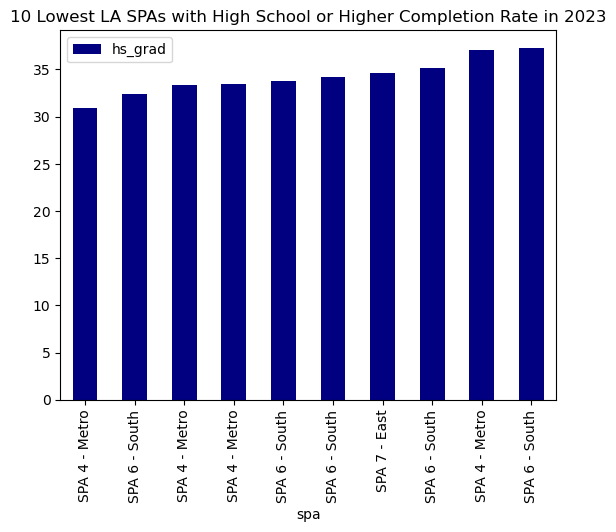

In [28]:
df_sorted.head(10).plot.bar(x='spa',
                            y='hs_grad',
                           title= '10 Lowest LA SPAs with High School or Higher Completion Rate in 2023',
                            color='navy')

In [ ]:
# It appears that SPAs 4 and 6 have the lowest education

In [ ]:
# Now let's chart the areas of LA that have the highest amount of people who have 
# obtained a high school degree or higher

In [29]:
df_high = df.sort_values(by='hs_grad',ascending = False)

In [ ]:
#Only going to look at top 10 areas since dataset is large

In [30]:
df_high[['spa','hs_grad']].head(10)

,spa,hs_grad
944,SPA 5 - West,100.0
954,SPA 5 - West,100.0
2486,SPA 2 - San Fernando,100.0
2484,SPA 5 - West,100.0
957,SPA 5 - West,100.0
956,SPA 5 - West,100.0
2296,SPA 2 - San Fernando,100.0
2479,SPA 8 - South Bay,100.0
2477,SPA 7 - East,100.0
2473,SPA 2 - San Fernando,100.0


<Axes: title={'center': '10 Highest LA SPAs with High School or Higher Completion Rate in 2023'}, xlabel='spa'>

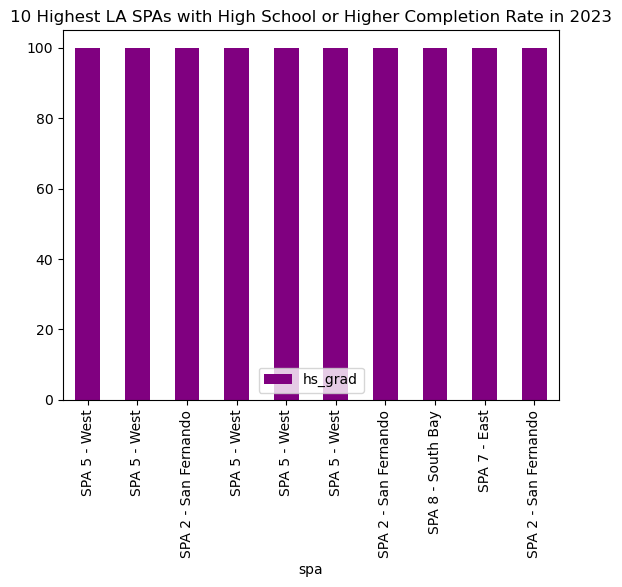

In [33]:
df_high.head(10).plot.bar(x='spa',
                            y='hs_grad',
                           title= '10 Highest LA SPAs with High School or Higher Completion Rate in 2023',
                            color='purple')

In [ ]:
# It appears that SPA 5 dominates with education which makes sense given it's an 
# area with high SES.

In [ ]:
# map time! Importing geopandas

In [37]:
import geopandas as gpd

In [42]:
map=gpd.read_file('Census_Tracts_2020.geojson')
map.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [43]:
# Only really need FIPS and geometry, so let's subset the data
map = map[['CT20','geometry']]
map.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [44]:
# create a tract column
map['tract'] ='06' + '037' + map['CT20']

In [45]:
# check it!
map.head()

,CT20,geometry,tract
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [ ]:
# Going to merge both datasets on tract (AKA FIPS)

In [47]:
# creating a new dataframe based on the join
df_2=map.merge(df,on="tract")

In [ ]:
# checking it

In [48]:
df_2.head()

,CT20,geometry,tract,OBJECTID,name,hs_grad,sup_dist,csa,spa,SHAPE_Length,SHAPE_Area
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1,1011.10,90.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,2,1011.22,83.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,4,1012.20,75.1,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,5,1012.21,76.5,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,7,1012.22,82.4,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028


In [ ]:
#Let's put the merged dataset on a map

<Axes: >

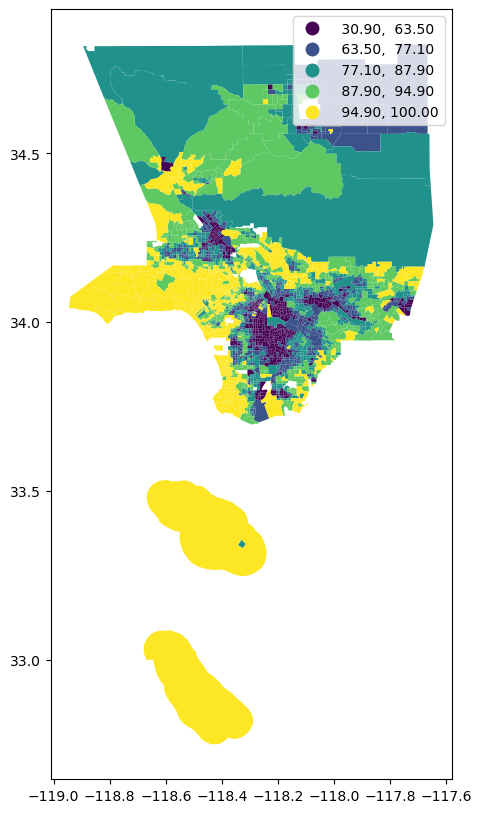

In [49]:
df_2.plot(figsize=(12,10),
                 column='hs_grad',
                 legend=True, 
                 scheme='quantiles')

In [ ]:
# This map shows that residents in the metro city area of LA have the lowest proportion of 
# people who obtained a high school degree or higher

In [ ]:
### END OF ASSIGNMENT 3 ###